In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model, decomposition, datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
in1=pd.read_csv('y_df_utf-8.csv',delimiter='\t')

In [3]:
in1.describe()

,ENTITLEMENT_EVENTS_ENTITLEMENT_EVENTS,EQUIPMENT_ID_EQUIPMENT_ID,YOM_YOM,SERVICE_ORDER_ID_SERVICE_ORDER_ID,BILLABLE_BILLABLE,ACTUAL_DOWNTIME_mean,ACTUAL_DOWNTIME_std,ACTUAL_DOWNTIME_sum,MAINTENANCE_TIME_mean,MAINTENANCE_TIME_std,...,u_parts_mean,u_parts_std,u_parts_sum,part_cost_mean,part_cost_std,part_cost_sum,repairs,timeframe,repairs_per_year,TARGET
count,35354.000000,3.535400e+04,14855.000000,35354.000000,35354.000000,33112.000000,29386.000000,35354.000000,35354.000000,33597.000000,...,21487.000000,14925.000000,35354.000000,21487.000000,14925.000000,35354.000000,35354.000000,35354.000000,35354.000000,35354.000000
mean,1.111671,1.123584e+07,2003.596701,5.339085,0.549528,162.255067,158.454564,609.802639,1.863527,1.634517,...,1.689779,0.811962,3.279799,407.883360,328.163182,855.551002,1.158737,636.735306,6.580091,0.077332
std,0.972904,3.609420e+05,77.003863,22.005182,4.644691,241.600563,336.666139,1752.307503,7.796296,21.278418,...,1.204964,0.914488,13.505865,824.705730,970.484281,3824.750301,8.478740,242.524433,46.964577,0.267121
min,0.000000,1.001528e+07,0.000000,1.000000,0.000000,-10091.429537,0.000000,-30274.288612,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3513.140000,0.000000,-7026.280000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.095457e+07,2003.000000,3.000000,0.000000,37.048611,44.793467,69.697984,0.650000,0.316228,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,511.000000,0.000000,0.000000
50%,1.000000,1.134598e+07,2006.000000,4.000000,0.000000,110.502109,103.019719,341.097912,1.005556,0.680686,...,1.500000,0.577350,1.000000,87.542857,51.110499,0.000000,0.000000,720.000000,0.000000,0.000000
75%,1.000000,1.153912e+07,2010.000000,6.000000,1.000000,225.999999,192.417480,803.496804,2.250000,1.732051,...,2.000000,1.154701,4.000000,512.995000,359.804215,494.810000,1.000000,786.000000,0.850816,0.000000
max,14.000000,1.202774e+07,2042.000000,3685.000000,829.000000,22844.776528,44889.110831,166002.718306,1015.666667,2581.824420,...,23.000000,8.485281,1782.000000,46419.162500,82159.926145,360762.860000,1471.000000,1006.000000,1095.000000,1.000000


In [4]:
print(in1.shape)
print(in1.dropna(subset=['TARGET']).shape)

(35354, 58)
(35354, 58)


In [5]:
in1.dropna(subset=['TARGET'],inplace=True)

In [6]:
in1.TARGET.value_counts()

0.0    32620
1.0     2734
Name: TARGET, dtype: int64

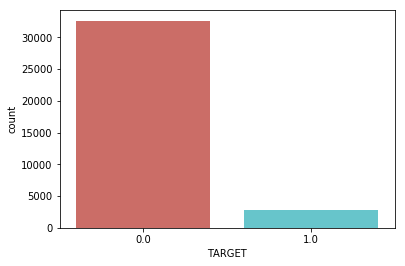

In [7]:
sns.countplot(x='TARGET',data=in1, palette='hls')
# plt.savefig("count_plot.png")

---------------------------------
# Excercise Portion

### get some predictors

In [8]:
#get categorical variables
cat_vars=list(in1.select_dtypes(include='object').columns)
# cat_vars

In [9]:
cat_vars

['ASSET_DESCRIPTION',
 'ONESOURCE_TAG',
 'SYSTEM_ID_SYSTEM_ID',
 'DEPARTMENT_DEPARTMENT',
 'CUSTOMER_NAME_CUSTOMER_NAME',
 'SITE_NAME_SITE_NAME',
 'OFFICE_REGION_OFFICE_REGION',
 'OFFICE_COUNTRY_OFFICE_COUNTRY',
 'BUILDING_BUILDING',
 'ROOM_ROOM',
 'GxP_FLAG_GxP_FLAG',
 'ASSET_DESCRIPTION_ASSET_DESCRIPTION',
 'AMGEN_COST_CAT_AMGEN_COST_CAT',
 'MANUFACTURER_MANUFACTURER',
 'MODEL_MODEL',
 'LEVEL-1_SERVICE_TRIAGE_LEVEL-1_SERVICE_TRIAGE',
 'LEVEL-2_SERVICE_TRIAGE_DS_LEVEL-2_SERVICE_TRIAGE_DS',
 'COVERAGE_COVERAGE',
 'SERIAL_SERIAL',
 'CALL_RECEIVED_DATE_max',
 'CALL_RECEIVED_DATE_min',
 'engn_tier']

In [10]:
#drop some that we don't want to create dummy variables for
cat_vars.remove('ONESOURCE_TAG')
cat_vars.remove('SYSTEM_ID_SYSTEM_ID')
cat_vars.remove('ASSET_DESCRIPTION_ASSET_DESCRIPTION')#duplicate
cat_vars.remove('SERIAL_SERIAL')
cat_vars.remove('CALL_RECEIVED_DATE_max')
cat_vars.remove('CALL_RECEIVED_DATE_min')
cat_vars.remove('COVERAGE_COVERAGE')
cat_vars.remove('AMGEN_COST_CAT_AMGEN_COST_CAT')

In [11]:
cat_vars

['ASSET_DESCRIPTION',
 'DEPARTMENT_DEPARTMENT',
 'CUSTOMER_NAME_CUSTOMER_NAME',
 'SITE_NAME_SITE_NAME',
 'OFFICE_REGION_OFFICE_REGION',
 'OFFICE_COUNTRY_OFFICE_COUNTRY',
 'BUILDING_BUILDING',
 'ROOM_ROOM',
 'GxP_FLAG_GxP_FLAG',
 'MANUFACTURER_MANUFACTURER',
 'MODEL_MODEL',
 'LEVEL-1_SERVICE_TRIAGE_LEVEL-1_SERVICE_TRIAGE',
 'LEVEL-2_SERVICE_TRIAGE_DS_LEVEL-2_SERVICE_TRIAGE_DS',
 'engn_tier']

In [12]:
#create dummy variables
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(in1[var], prefix=var)
    in12=in1.join(cat_list)
    in1=in12

data_vars=in1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [13]:
xdrop=['ONESOURCE_TAG',
 'SYSTEM_ID_SYSTEM_ID',
 'ASSET_DESCRIPTION_ASSET_DESCRIPTION',
 'EQUIPMENT_ID_EQUIPMENT_ID',
 'SERIAL_SERIAL',
 'CALL_RECEIVED_DATE_max',
 'CALL_RECEIVED_DATE_min']

In [14]:
for j in xdrop:
    to_keep.remove(j)

In [15]:
in3=in1[to_keep]

In [16]:
in3.shape

(35354, 14550)

In [17]:
in3.fillna(value=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [18]:
in3.head()

,AMGEN_COST_CAT_AMGEN_COST_CAT,COVERAGE_COVERAGE,ENTITLEMENT_EVENTS_ENTITLEMENT_EVENTS,YOM_YOM,SERVICE_ORDER_ID_SERVICE_ORDER_ID,BILLABLE_BILLABLE,ACTUAL_DOWNTIME_mean,ACTUAL_DOWNTIME_std,ACTUAL_DOWNTIME_sum,MAINTENANCE_TIME_mean,...,engn_tier_['JR' 'OTHER' 'SR'],engn_tier_['JR' 'OTHER'],engn_tier_['JR' 'OUTLIERS' 'SR'],engn_tier_['JR' 'OUTLIERS'],engn_tier_['JR' 'SR'],engn_tier_['OTHER' 'OUTLIERS' 'SR'],engn_tier_['OTHER' 'OUTLIERS'],engn_tier_['OTHER' 'SR'],engn_tier_['OUTLIERS' 'SR'],engn_tier_[]
0,WELISMG,ZASM-Asset Manage;ZCON-Contract purchase;ZE01-...,1.0,0.0,6,1,225.382777,16.729153,676.148332,0.500000,...,0,0,0,0,0,0,0,0,0,0
1,WELISMG,ZASM-Asset Manage;ZCON-Contract purchase;ZE01-...,1.0,0.0,4,1,205.000000,0.000000,205.000000,0.250000,...,0,0,0,0,0,0,0,0,0,0
2,WELISMG,ZASM-Asset Manage;ZCON-Contract purchase;ZE01-...,1.0,0.0,5,1,221.189444,20.999893,442.378888,0.400000,...,0,0,0,0,0,0,0,0,0,0
3,WELISMG,ZASM-Asset Manage;ZCON-Contract purchase;ZE01-...,1.0,0.0,6,1,285.278194,83.113528,570.556388,0.333333,...,0,0,0,0,0,0,0,0,0,0
4,WELISMG,ZASM-Asset Manage;ZCON-Contract purchase;ZE01-...,1.0,0.0,5,1,221.044583,18.285978,442.089166,0.400000,...,0,0,0,0,0,0,0,0,0,0


## Logistic Regression

In [19]:
X = in3.loc[:, (in3.columns != 'TARGET')].select_dtypes(include=np.number)
y = in3.TARGET

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
logreg = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000
#     C=0.25 #make this smaller (close to 0) to increase regularization strength
)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results and calculating accuracy

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


#### Other metrics

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85      9746
         1.0       0.19      0.62      0.29       861

   micro avg       0.75      0.75      0.75     10607
   macro avg       0.57      0.69      0.57     10607
weighted avg       0.90      0.75      0.80     10607



### ROC curves

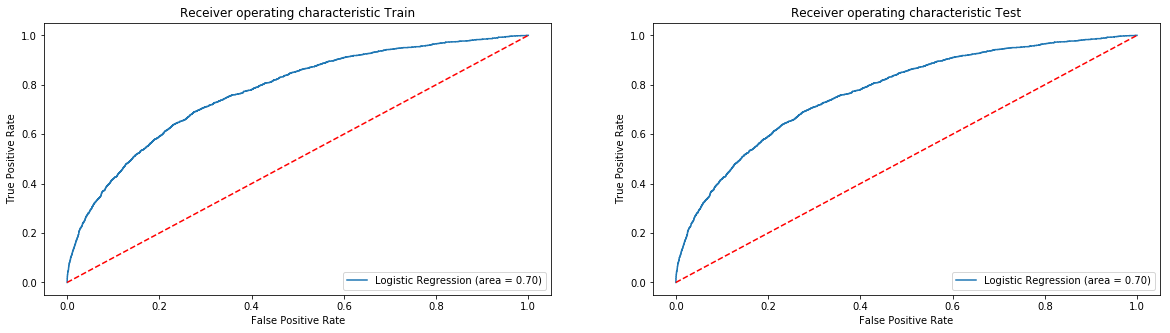

In [24]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

# ax0.figure()
ax0.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax0.plot([0, 1], [0, 1],'r--')
# ax0.xlim([0.0, 1.0])
# ax0.ylim([0.0, 1.05])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.set_title('Receiver operating characteristic Train')
ax0.legend(loc="lower right")
# ax0.savefig('Log_ROC')

ax1.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
# ax1.xlim([0.0, 1.0])
# ax1.ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic Test')
ax1.legend(loc="lower right")
# ax1.savefig('Log_ROC')

plt.show()

------------------------------------------------------------
## Logistic Regression: Regularization

In [25]:
logreg_r = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    C=0.10 #make this smaller (close to 0) to increase regularization strength
)
logreg_r.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Predicting the test set results and calculating accuracy

In [26]:
y_pred = logreg_r.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_r.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


#### Other metrics

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85      9746
         1.0       0.19      0.62      0.29       861

   micro avg       0.75      0.75      0.75     10607
   macro avg       0.57      0.70      0.57     10607
weighted avg       0.90      0.75      0.81     10607



### ROC curves

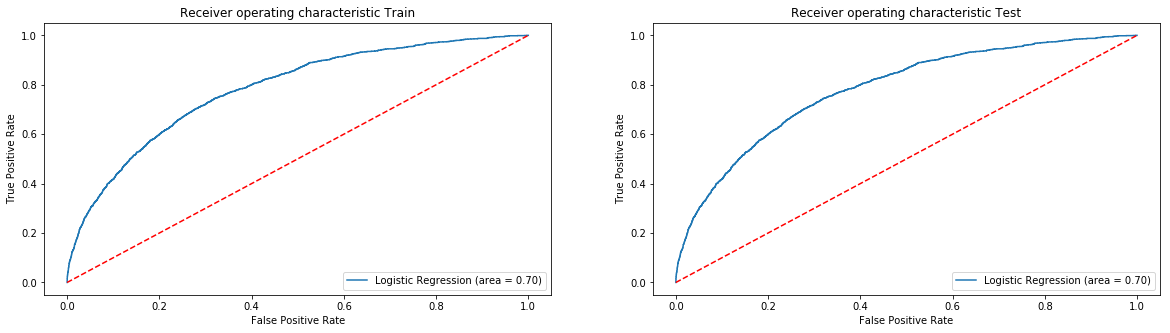

In [28]:
logit_roc_auc = roc_auc_score(y_train, logreg_r.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg_r.predict_proba(X_train)[:,1])

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

# ax0.figure()
ax0.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax0.plot([0, 1], [0, 1],'r--')
# ax0.xlim([0.0, 1.0])
# ax0.ylim([0.0, 1.05])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.set_title('Receiver operating characteristic Train')
ax0.legend(loc="lower right")
# ax0.savefig('Log_ROC')

ax1.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
# ax1.xlim([0.0, 1.0])
# ax1.ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic Test')
ax1.legend(loc="lower right")
# ax1.savefig('Log_ROC')

plt.show()

## PCA

In [29]:
X.shape

(35354, 14547)

In [30]:
# X_in=StandardScaler().fit_transform(in1.select_dtypes(include=np.number).drop(columns='TARGET'))
X_in=StandardScaler().fit_transform(X)
# Y_in=in1.TARGET
Y_in=y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
# X_in=np.nan_to_num(X_in)

In [31]:
pca = decomposition.PCA(n_components=20)

In [32]:
pca.fit(X_in)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
X_in_pca=pca.transform(X_in)

In [34]:
print('Original columns:\t',X_in.shape[1])
print('PCA dimension reduced columns:\t',X_in_pca.shape[1])

Original columns:	 14547
PCA dimension reduced columns:	 20


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_in_pca, Y_in, test_size=0.3, random_state=0)

In [36]:
logreg_pca = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    C=0.50 #make this smaller (close to 0) to increase regularization strength
)
logreg_pca.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred = logreg_pca.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_pca.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.74      0.83      9746
         1.0       0.17      0.60      0.26       861

   micro avg       0.72      0.72      0.72     10607
   macro avg       0.56      0.67      0.55     10607
weighted avg       0.89      0.72      0.78     10607



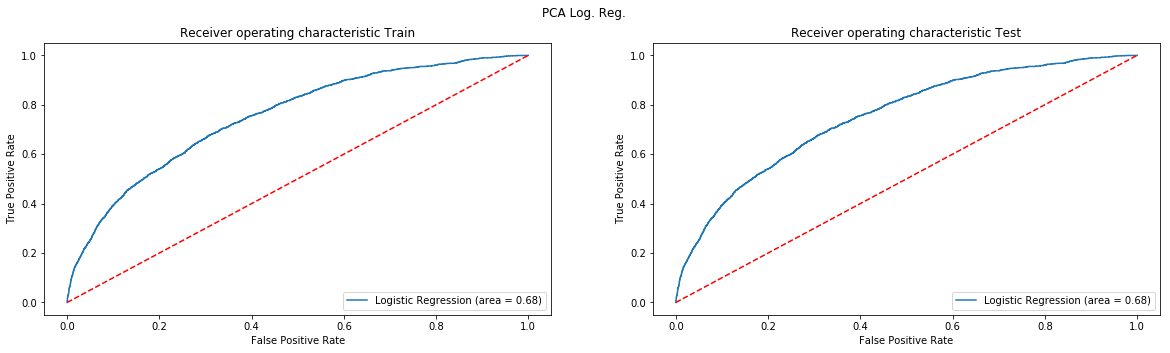

In [39]:
logit_roc_auc = roc_auc_score(y_train, logreg_pca.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg_pca.predict_proba(X_train)[:,1])

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

# ax0.figure()
ax0.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax0.plot([0, 1], [0, 1],'r--')
# ax0.xlim([0.0, 1.0])
# ax0.ylim([0.0, 1.05])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.set_title('Receiver operating characteristic Train')
ax0.legend(loc="lower right")
# ax0.savefig('Log_ROC')

ax1.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
# ax1.xlim([0.0, 1.0])
# ax1.ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic Test')
ax1.legend(loc="lower right")
# ax1.savefig('Log_ROC')

fig.suptitle('PCA Log. Reg.')

plt.show()

## LDA
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis

In [ ]:
# X_in=StandardScaler().fit_transform(in1.select_dtypes(include=np.number).drop(columns='TARGET'))
# Y_in=in1.TARGET

In [ ]:
# X_in=np.nan_to_num(X_in)

In [74]:
X_in.shape

(35354, 14547)

In [40]:
lda = LinearDiscriminantAnalysis(n_components=20)

In [41]:
# lda.fit(X_in,Y_in)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=20, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [87]:
%%time
X_in_lda=lda.fit(X_in,Y_in).transform(X_in)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Wall time: 26min 31s


In [88]:
X_in_lda.shape

(35354, 1)

In [89]:
X_in_lda

array([[-0.24911188],
       [-0.25045332],
       [-0.58385049],
       ...,
       [-0.58375552],
       [-0.58375552],
       [-0.58375552]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_in_lda, Y_in, test_size=0.3, random_state=0)

In [ ]:
logreg_pca = LogisticRegression(
    solver='liblinear',
    class_weight='balanced',
    max_iter=1000,
    C=0.50 #make this smaller (close to 0) to increase regularization strength
)
logreg_pca.fit(X_train, y_train)

In [ ]:
y_pred = logreg_pca.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_pca.score(X_test, y_test)))

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg_pca.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, logreg_pca.predict_proba(X_train)[:,1])

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2,figsize=(20,5))

# ax0.figure()
ax0.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax0.plot([0, 1], [0, 1],'r--')
# ax0.xlim([0.0, 1.0])
# ax0.ylim([0.0, 1.05])
ax0.set_xlabel('False Positive Rate')
ax0.set_ylabel('True Positive Rate')
ax0.set_title('Receiver operating characteristic Train')
ax0.legend(loc="lower right")
# ax0.savefig('Log_ROC')

ax1.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
ax1.plot([0, 1], [0, 1],'r--')
# ax1.xlim([0.0, 1.0])
# ax1.ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Receiver operating characteristic Test')
ax1.legend(loc="lower right")
# ax1.savefig('Log_ROC')

fig.suptitle('PCA Log. Reg.')

plt.show()